Module 1: Data Collection and Management

Load Dataset from NASA Exoplanet Archive (CSV)

In [40]:
import pandas as pd
import numpy as np

file_path = "Dataset_exoplanet.csv"
df = pd.read_csv(file_path, comment="#")

print("Original Dataset Shape:", df.shape)
df.head()


Original Dataset Shape: (6053, 84)


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


Validate Dataset Schema & Data Types

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6053 entries, 0 to 6052
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          6053 non-null   object 
 1   hostname         6053 non-null   object 
 2   sy_snum          6053 non-null   int64  
 3   sy_pnum          6053 non-null   int64  
 4   discoverymethod  6053 non-null   object 
 5   disc_year        6053 non-null   int64  
 6   disc_facility    6053 non-null   object 
 7   pl_controv_flag  6053 non-null   int64  
 8   pl_orbper        5737 non-null   float64
 9   pl_orbpererr1    5246 non-null   float64
 10  pl_orbpererr2    5246 non-null   float64
 11  pl_orbperlim     5737 non-null   float64
 12  pl_orbsmax       5750 non-null   float64
 13  pl_orbsmaxerr1   3806 non-null   float64
 14  pl_orbsmaxerr2   3806 non-null   float64
 15  pl_orbsmaxlim    5751 non-null   float64
 16  pl_rade          6003 non-null   float64
 17  pl_radeerr1   

Check Dataset Completeness (Missing Values)

In [42]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing_Count": missing_count,
    "Missing_Percentage": missing_percent
}).sort_values(by="Missing_Percentage", ascending=False)

missing_summary

,Missing_Count,Missing_Percentage
pl_eqterr1,4311,71.220882
pl_eqterr2,4311,71.220882
pl_orbeccenerr1,4232,69.915744
pl_orbeccenerr2,4232,69.915744
st_spectype,3821,63.125723
...,...,...
pl_bmassprov,0,0.000000
rastr,0,0.000000
ra,0,0.000000
decstr,0,0.000000


Renaming the important coloumns

In [43]:
df = df.rename(columns={
    "pl_name": "planet_name",
    "hostname": "host_star",
    "discoverymethod": "discovery_method",
    "disc_year": "discovery_year",
    "pl_orbper": "orbital_period_days",
    "pl_orbsmax": "orbit_distance_au",
    "pl_rade": "planet_radius_earth",
    "pl_bmasse": "planet_mass_earth",
    "pl_eqt": "planet_temperature_k",
    "st_teff": "star_temperature_k",
    "st_rad": "star_radius_solar",
    "st_mass": "star_mass_solar",
    "st_met": "star_metallicity",
    "sy_dist": "distance_pc"
})


Remove Columns With Excessive Missing Data

In [44]:
minimum_valid_values = len(df) * 0.60
df = df.dropna(axis=1, thresh=minimum_valid_values)

print("Shape after removing high-null columns:", df.shape)

Shape after removing high-null columns: (6053, 73)


Fill Missing Numerical Values (Mean Imputation)

In [45]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_columns] = df[numeric_columns].fillna(
    df[numeric_columns].mean()
)

df.isnull().sum().sum()

np.int64(550)

Remove Physically Impossible Values

In [46]:
df = df[
    (df["planet_radius_earth"] > 0) &
    (df["orbit_distance_au"] > 0) &
    (df["planet_temperature_k"] > 0) &
    (df["star_temperature_k"] > 0)
]

df.reset_index(drop=True, inplace=True)
print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (6053, 73)


Data Analysis Using Visualizations

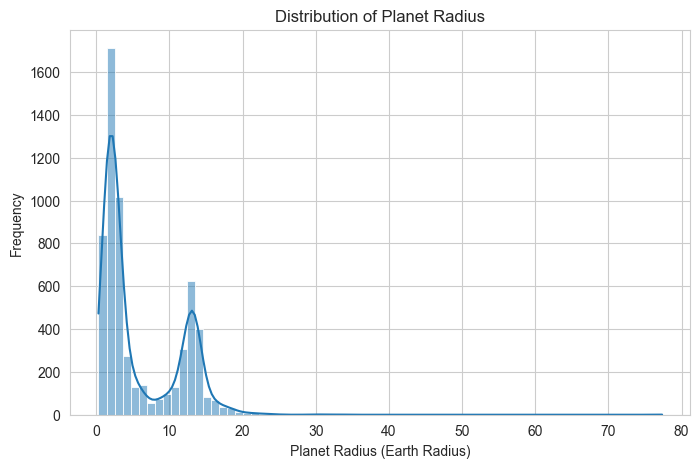

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

#histplot
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(df["planet_radius_earth"], kde=True)
plt.title("Distribution of Planet Radius")
plt.xlabel("Planet Radius (Earth Radius)")
plt.ylabel("Frequency")
plt.show()


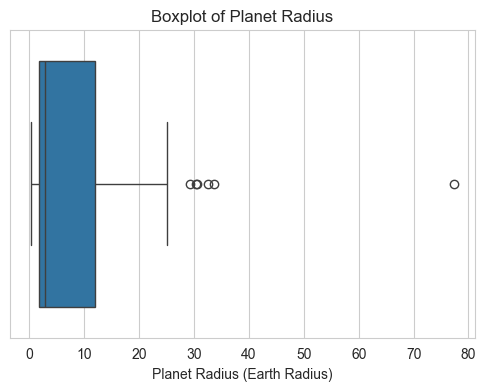

In [48]:
#boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["planet_radius_earth"])
plt.title("Boxplot of Planet Radius")
plt.xlabel("Planet Radius (Earth Radius)")
plt.show()


In [49]:
df.to_csv("exoplanet_complete.csv", index=False)
print("Module-1 dataset saved successfully.")

Module-1 dataset saved successfully.


Module 2: Data Cleaning and Feature Engineering

In [50]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

print("Numerical Features:")
print(numeric_columns)

print("\nCategorical Features:")
print(categorical_columns)

Numerical Features:
Index(['sy_snum', 'sy_pnum', 'discovery_year', 'pl_controv_flag',
       'orbital_period_days', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'orbit_distance_au', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'planet_radius_earth', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
       'planet_mass_earth', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjlim',
       'pl_orbeccen', 'pl_orbeccenlim', 'pl_insol', 'pl_insollim',
       'planet_temperature_k', 'pl_eqtlim', 'ttv_flag', 'star_temperature_k',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'star_radius_solar',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'star_mass_solar',
       'st_masserr1', 'st_masserr2', 'st_masslim', 'star_metallicity',
       'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_logglim', 'ra', 'dec', 'distance_pc', 'sy_disterr1',
       'sy_disterr2', 'sy_vmag', 'sy

One-Hot Encode Categorical Features

In [51]:
categorical_columns = df.select_dtypes(include=["object"]).columns

df_encoded = pd.get_dummies(
    df,
    columns=categorical_columns,
    drop_first=True
)

print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (6053, 19740)


Feature Engineering — Habitability Score Index

In [52]:
df_encoded["habitability_score"] = (
    (1 / df_encoded["planet_radius_earth"]) +
    (1 / df_encoded["planet_temperature_k"]) +
    (1 / df_encoded["orbit_distance_au"])
)

df_encoded["habitability_score"].describe()


count    6053.000000
mean       13.418672
std        15.763052
min         0.032889
25%         2.502501
50%         9.575193
75%        18.915320
max       227.445752
Name: habitability_score, dtype: float64

Feature Engineering — Stellar Compatibility Index

In [53]:
df_encoded["stellar_compatibility_index"] = (
    (1 / df_encoded["star_temperature_k"]) +
    (1 / df_encoded["star_radius_solar"]) +
    (1 / df_encoded["star_mass_solar"])
)

df_encoded["stellar_compatibility_index"].describe()


count    6053.000000
mean        2.680374
std         3.864275
min         0.111231
25%         1.725435
50%         2.111168
75%         2.581870
max       107.044172
Name: stellar_compatibility_index, dtype: float64

Normalize Numerical Features

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_encoded[numeric_columns] = scaler.fit_transform(
    df_encoded[numeric_columns]
)


In [55]:
df_encoded.describe()

,sy_snum,sy_pnum,discovery_year,pl_controv_flag,orbital_period_days,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,orbit_distance_au,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,habitability_score,stellar_compatibility_index
count,6053.000000,6053.000000,6053.000000,6053.000000,6.053000e+03,6.053000e+03,6053.000000,6053.000000,6053.000000,6.053000e+03,...,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000
mean,0.034694,0.110217,0.753210,0.006774,1.855545e-04,1.941421e-04,0.999792,0.998954,0.000826,3.520592e-04,...,0.031501,0.991681,0.372012,0.003078,0.996920,0.555986,0.008353,0.991647,13.418672,2.680374
std,0.114367,0.165688,0.148116,0.082029,1.285925e-02,1.285377e-02,0.012872,0.031470,0.018028,1.288411e-02,...,0.042948,0.016614,0.081069,0.024909,0.025463,0.161749,0.027509,0.027509,15.763052,3.864275
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032889,0.111231
25%,0.000000,0.000000,0.666667,0.000000,1.113284e-08,3.829787e-14,1.000000,1.000000,0.000003,2.132565e-07,...,0.009358,0.990435,0.322094,0.000901,0.997696,0.464223,0.002361,0.992332,2.502501,1.725435
50%,0.000000,0.000000,0.727273,0.000000,3.064252e-08,3.710638e-13,1.000000,1.000000,0.000006,5.763689e-06,...,0.025492,0.993372,0.388560,0.001202,0.998798,0.583493,0.004278,0.995722,9.575193,2.111168
75%,0.000000,0.142857,0.878788,0.000000,1.415928e-07,7.021277e-10,1.000000,1.000000,0.000024,3.520592e-04,...,0.036786,0.997567,0.435194,0.002204,0.999099,0.688045,0.007668,0.997639,18.915320,2.581870
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,227.445752,107.044172


Pearson Correlation Analysis

In [56]:
numeric_df = df_encoded.select_dtypes(include=["int64", "float64"])

In [57]:
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

In [58]:
target_corr = (
    numeric_df
    .corr()["habitability_score"]
    .sort_values(ascending=False)
)

target_corr


habitability_score      1.000000
planet_temperature_k    0.411662
st_logg                 0.246038
pl_insol                0.234961
sy_vmag                 0.230930
                          ...   
planet_radius_earth    -0.182564
pl_radj                -0.182614
planet_mass_earth      -0.186122
pl_bmassj              -0.186134
pl_orbeccen            -0.211312
Name: habitability_score, Length: 64, dtype: float64

In [59]:
target_corr = target_corr.drop("habitability_score")

In [60]:
top_features = target_corr.abs().head(20).index.tolist()
top_features


['planet_temperature_k',
 'st_logg',
 'pl_insol',
 'sy_vmag',
 'sy_gaiamag',
 'st_tefflim',
 'sy_kmag',
 'sy_disterr2',
 'st_meterr1',
 'pl_orbeccenlim',
 'st_masserr2',
 'stellar_compatibility_index',
 'sy_vmagerr1',
 'st_raderr2',
 'dec',
 'pl_bmasselim',
 'pl_bmassjlim',
 'st_loggerr2',
 'discovery_year',
 'sy_gaiamagerr2']

In [61]:
X = numeric_df[top_features]
y = numeric_df["habitability_score"]

In [62]:
corr_top = X.corr()

Correlation Heatmap

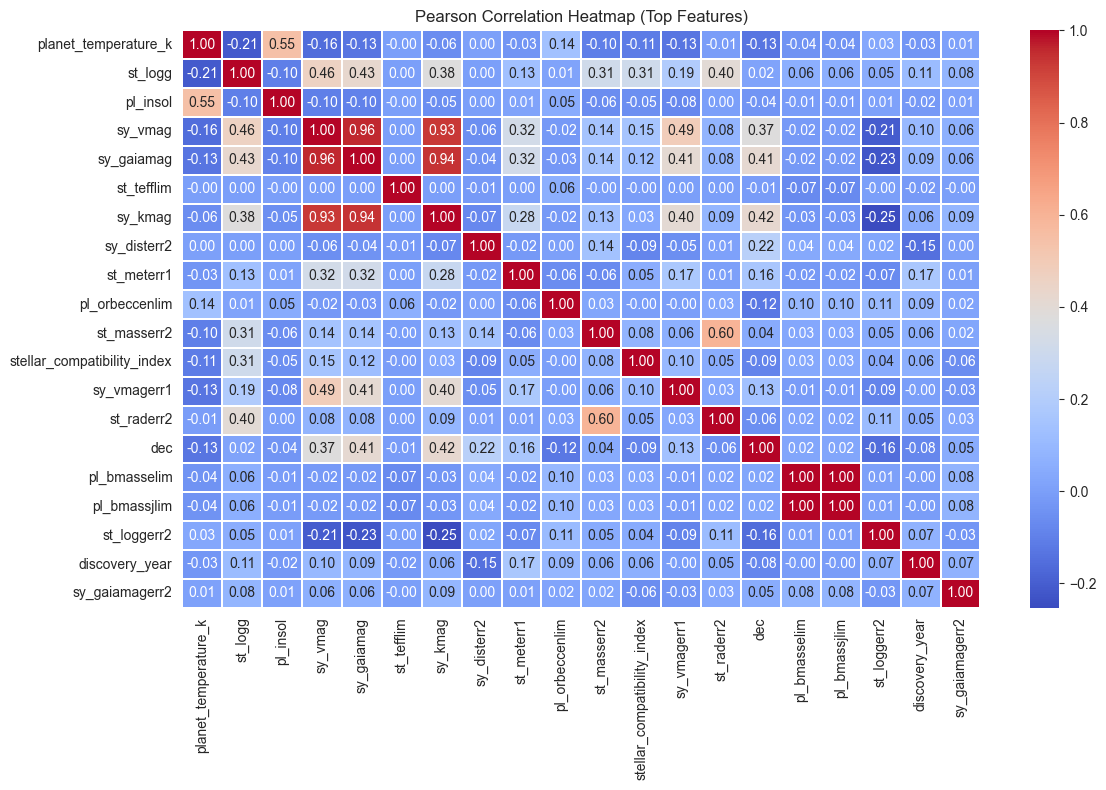

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_top,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.3
)
plt.title("Pearson Correlation Heatmap (Top Features)")
plt.tight_layout()
plt.show()


In [64]:
df_encoded.to_csv("exoplanet_module2.csv", index=False)
print("Module-2 dataset saved successfully.")

Module-2 dataset saved successfully.


Module 3: Machine Learning Dataset Preparation

Imports

In [65]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler_score = MinMaxScaler()

df[["temp_n", "insol_n", "radius_n"]] = scaler_score.fit_transform(
    df[["planet_temperature_k", "pl_insol", "planet_radius_earth"]]
)


In [67]:
df["habitability_score"] = (
    0.4 * (1 - abs(df["temp_n"] - 0.5)) +
    0.3 * (1 - abs(df["insol_n"] - 0.5)) +
    0.3 * (1 - abs(df["radius_n"] - 0.5))
)


In [68]:
print(df["habitability_score"].describe())


count    6053.000000
mean        0.610908
std         0.050870
min         0.511821
25%         0.573207
50%         0.602118
75%         0.640089
max         0.850230
Name: habitability_score, dtype: float64


In [69]:
threshold = df["habitability_score"].median()
df["habitable"] = (df["habitability_score"] > threshold).astype(int)


Verify Target

In [70]:
print(df["habitable"].value_counts())


habitable
0    3029
1    3024
Name: count, dtype: int64


Select Features

In [71]:
features = [
    "planet_mass_earth",
    "orbital_period_days",
    "orbit_distance_au",
    "star_temperature_k",
    "star_radius_solar"
]

X = df[features]
y = df["habitable"]


Train–Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Data Pipeline (Scaling)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
print("Train classes:\n", y_train.value_counts())
print("Test classes:\n", y_test.value_counts())


Train classes:
 habitable
0    2423
1    2419
Name: count, dtype: int64
Test classes:
 habitable
0    606
1    605
Name: count, dtype: int64


Module 4: AI Model for Habitability Prediction

Common Imports

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_binary(name, y_true, y_pred, y_prob):
    print(f"{name} Accuracy:", accuracy_score(y_true, y_pred))
    print(f"{name} Precision:", precision_score(y_true, y_pred))
    print(f"{name} Recall:", recall_score(y_true, y_pred))
    print(f"{name} F1-score:", f1_score(y_true, y_pred))
    print(f"{name} ROC-AUC:", roc_auc_score(y_true, y_prob))
  


RANDOM FOREST CLASSIFIER

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=120,
    max_depth=5,
    min_samples_leaf=15,
    min_samples_split=30,
    max_features=2,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
pos_index = list(rf_model.classes_).index(1)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, pos_index]

evaluate_binary("Random Forest", y_test, y_pred_rf, y_prob_rf)


Random Forest Accuracy: 0.8959537572254336
Random Forest Precision: 0.8932676518883416
Random Forest Recall: 0.8991735537190083
Random Forest F1-score: 0.8962108731466227
Random Forest ROC-AUC: 0.963021302130213


LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    C=0.1,
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

evaluate_binary("Logistic Regression", y_test, y_pred_lr, y_prob_lr)


Logistic Regression Accuracy: 0.7390586292320397
Logistic Regression Precision: 0.7942973523421588
Logistic Regression Recall: 0.6446280991735537
Logistic Regression F1-score: 0.7116788321167883
Logistic Regression ROC-AUC: 0.8169080544418079


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_multiclass(name, y_true, y_pred):
    print(f"{name} Accuracy:", accuracy_score(y_true, y_pred))
    print(f"{name} Precision (macro):", precision_score(y_true, y_pred, average="macro"))
    print(f"{name} Recall (macro):", recall_score(y_true, y_pred, average="macro"))
    print(f"{name} F1-score (macro):", f1_score(y_true, y_pred, average="macro"))


In [94]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=80,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

evaluate_multiclass("XGBoost", y_test, y_pred_xgb)


XGBoost Accuracy: 0.8984310487200661
XGBoost Precision (macro): 0.8989022691898091
XGBoost Recall (macro): 0.8984452990753621
XGBoost F1-score (macro): 0.8984033377872631


Ranking Exoplanets Based on Predicted Habitability Scores

In [95]:
df["predicted_habitability_score"] = rf_model.predict_proba(
    scaler.transform(df[features])
)[:, pos_index]

ranked_planets = df.sort_values(
    by="predicted_habitability_score",
    ascending=False
)

ranked_planets.head(10)


,planet_name,host_star,sy_snum,sy_pnum,discovery_method,discovery_year,disc_facility,pl_controv_flag,orbital_period_days,pl_orbpererr1,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,temp_n,insol_n,radius_n,habitability_score,habitable,predicted_habitability_score
378,HAT-P-24 b,HAT-P-24,2,1,Transit,2010,HATNet,0,3.355240,7.000000e-06,...,-0.020,11.6396,0.000476,-0.000476,0.399153,0.028840,0.185142,0.723856,1,0.994226
4584,Kepler-8 b,Kepler-8,1,1,Transit,2010,Kepler,0,3.522499,7.000000e-07,...,-0.016,13.5299,0.000264,-0.000264,0.409861,0.032180,0.202021,0.734205,1,0.994226
5637,TOI-5592 b,TOI-5592,1,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),0,2.608585,1.800000e-06,...,-0.018,12.4963,0.000188,-0.000188,0.437002,0.038129,0.218609,0.751822,1,0.994144
5787,WASP-1 b,WASP-1,2,1,Transit,2007,SuperWASP,0,2.519945,5.000000e-07,...,-0.018,11.5349,0.000675,-0.000675,0.442729,0.047250,0.211771,0.754798,1,0.994144
5408,TOI-2346 b,TOI-2346,1,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),0,3.331203,2.400000e-06,...,-0.019,11.9242,0.000275,-0.000275,0.412102,0.030290,0.205222,0.735494,1,0.994098
5967,WASP-92 b,WASP-92,1,1,Transit,2016,SuperWASP,0,2.174674,1.600000e-06,...,-0.018,12.8183,0.000296,-0.000296,0.457420,0.036130,0.208569,0.756378,1,0.994085
103,CoRoT-11 b,CoRoT-11,1,1,Transit,2010,CoRoT,0,2.994330,1.100000e-05,...,-0.022,12.8410,0.000336,-0.000336,0.404133,0.042108,0.204073,0.735508,1,0.994080
5791,WASP-102 b,WASP-102,1,1,Transit,2025,SuperWASP,0,2.709813,3.000000e-07,...,-0.017,12.5620,0.000216,-0.000216,0.407620,0.028797,0.189507,0.728539,1,0.994031
6001,XO-7 b,XO-7,1,1,Transit,2019,XO,0,2.864142,4.300000e-06,...,-0.024,10.4575,0.000449,-0.000449,0.425548,0.034298,0.195764,0.739238,1,0.994018
5499,TOI-3523 A b,TOI-3523 A,3,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),0,2.304590,8.200000e-07,...,-0.023,12.4946,0.000740,-0.000740,0.485558,0.057684,0.203330,0.772527,1,0.993950


In [96]:
import joblib

joblib.dump(rf_model, "backend/rf_model.pkl")
joblib.dump(scaler, "backend/scaler.pkl")


['backend/scaler.pkl']